# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned data (replace with your actual file name)
df = pd.read_csv("./Data/CleanedRetailSalesData.csv", parse_dates=['date']) # Parse 'date' as datetime
df

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,electronics,3,50,150


# 1. Sales Trends Over Time (Monthly)

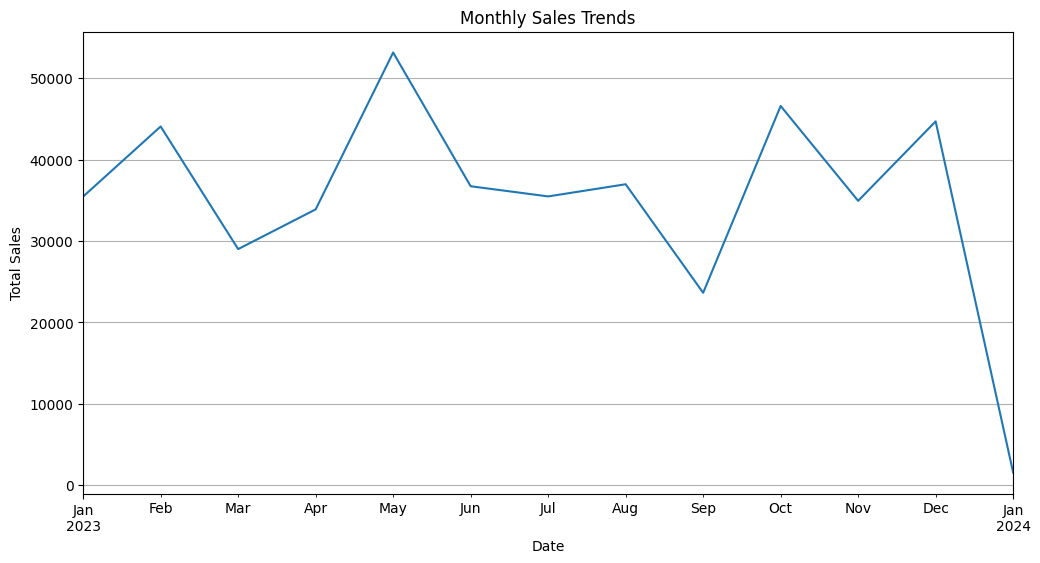

<Figure size 640x480 with 0 Axes>

In [3]:
monthly_sales = df.resample('M', on='date')['total_amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("./Figures/Sales_Trends.png")  # Saves as PNG (default)

# 2. Top Performing Product Categories

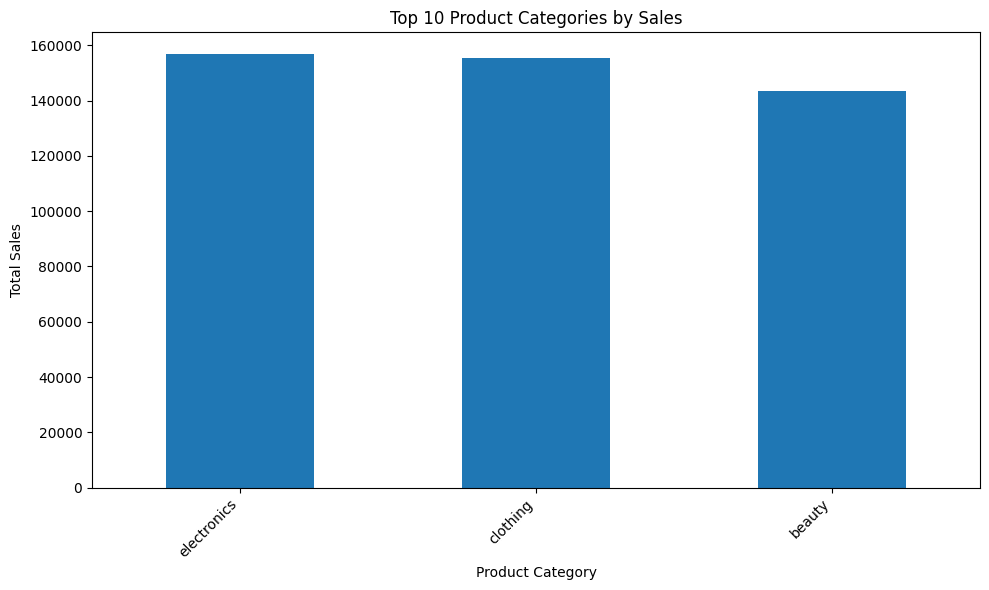

<Figure size 640x480 with 0 Axes>

In [4]:
top_categories = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Save the figure
plt.savefig("./Figures/Product_Categories.png")  # Saves as PNG (default)

# 3. Sales by Region (If you have a 'region' column)

In [5]:
# Assuming you have a 'region' column in your data:
if 'region' in df.columns:
    regional_sales = df.groupby('region')['total_amount'].sum()
    plt.figure(figsize=(8, 6))
    regional_sales.plot(kind='pie', autopct='%1.1f%%')  # autopct for percentages
    plt.title('Sales Distribution by Region')
    plt.ylabel('') # Remove default y-axis label for pie charts
    plt.show()
    
    # Save the figure
    plt.savefig("./Figures/Sales_Distribution.png")  # Saves as PNG (default)
else:
    print("No 'region' column found in the data.")

No 'region' column found in the data.


# 4. Customer Demographics Analysis (Gender)

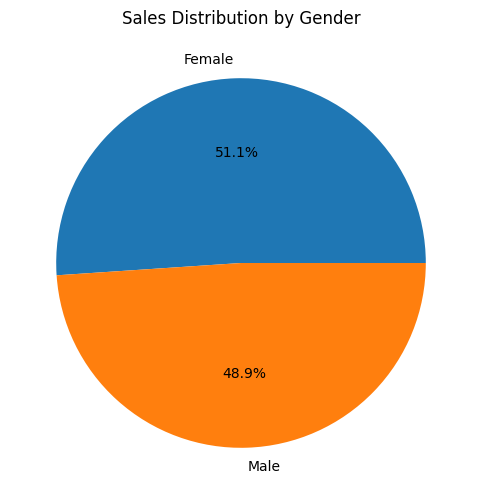

<Figure size 640x480 with 0 Axes>

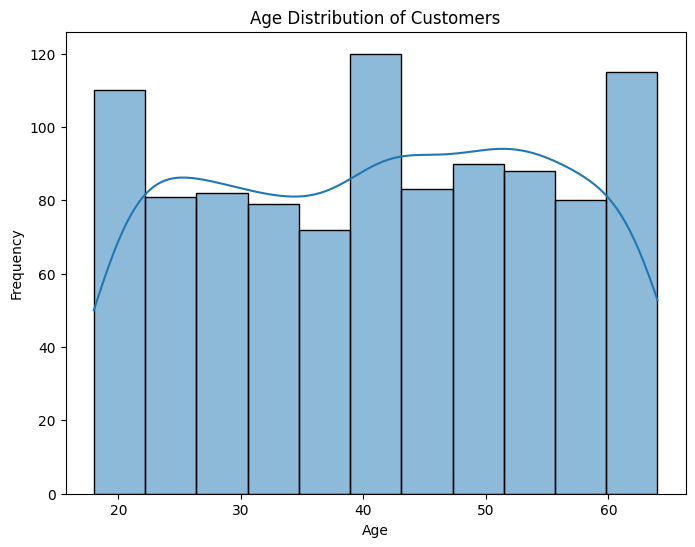

<Figure size 640x480 with 0 Axes>

In [6]:
if 'gender' in df.columns:
    gender_sales = df.groupby('gender')['total_amount'].sum()
    plt.figure(figsize=(6, 6))
    gender_sales.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Sales Distribution by Gender')
    plt.ylabel('')
    plt.show()
    
    # Save the figure
    plt.savefig("./Figures/Gender_Distribution.png")  # Saves as PNG (default)

    # Age distribution (using histogram)
    if 'age' in df.columns:
      plt.figure(figsize=(8, 6))
      sns.histplot(df['age'], kde=True) # kde adds a density curve
      plt.title('Age Distribution of Customers')
      plt.xlabel('Age')
      plt.ylabel('Frequency')
      plt.show()
      
      # Save the figure
      plt.savefig("./Figures/Customer_Distribution.png")  # Saves as PNG (default)
    else:
        print("No 'age' column found in the data.")

else:
    print("No 'gender' column found in the data.")

# 5. Correlation Analysis (Example: Quantity and Total Amount)


Correlation between Quantity and Total Amount: 0.37370705412140603


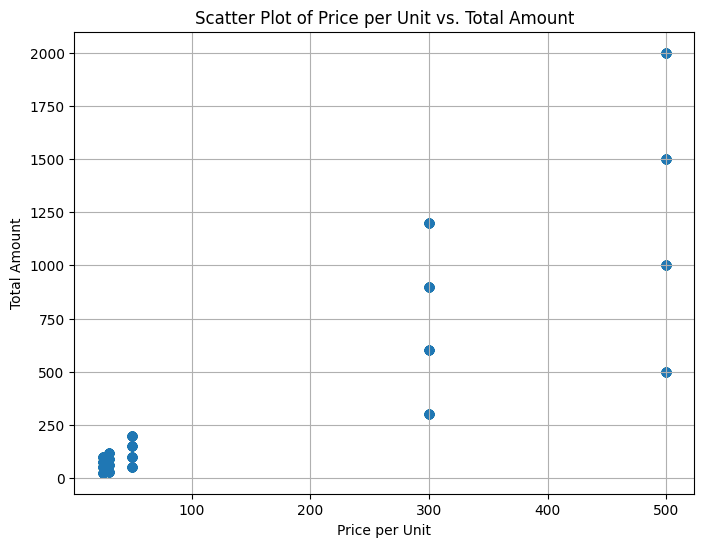

<Figure size 640x480 with 0 Axes>

In [7]:
correlation = df['quantity'].corr(df['total_amount'])
print(f"\nCorrelation between Quantity and Total Amount: {correlation}")

# 6. Scatter Plot (Example: Price per Unit vs. Total Amount)
plt.figure(figsize=(8, 6))
plt.scatter(df['price_per_unit'], df['total_amount'], alpha=0.5) # alpha for transparency
plt.title('Scatter Plot of Price per Unit vs. Total Amount')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("./Figures/Sales_ScatterPlot.png")  # Saves as PNG (default)